# Yeild prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Load and Inspect Data

In [2]:
df=pd.read_csv('crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### checking for Missing Values

In [4]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


### Handle Missing Values

In [5]:
df.dropna(subset=['Production'], inplace=True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Checking for duplicates

In [6]:
print(df.duplicated().sum())

0


###  Outliers

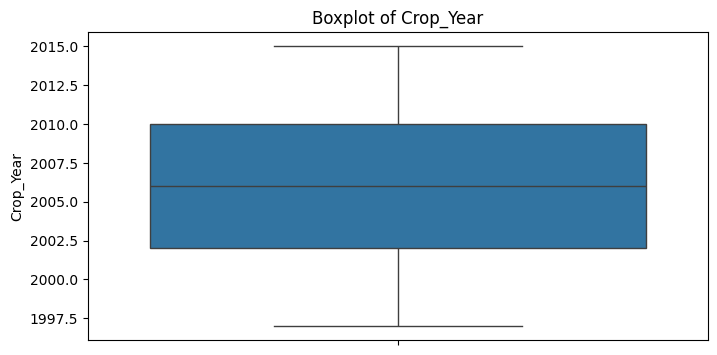

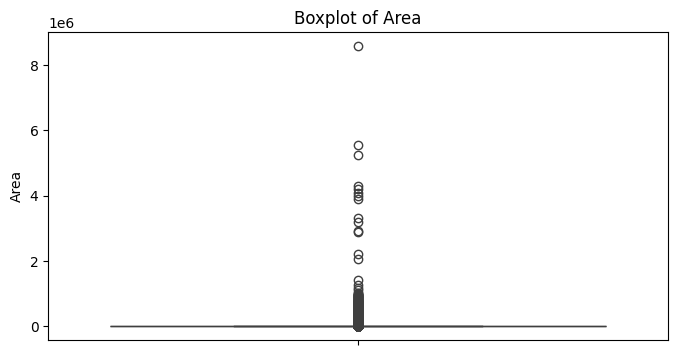

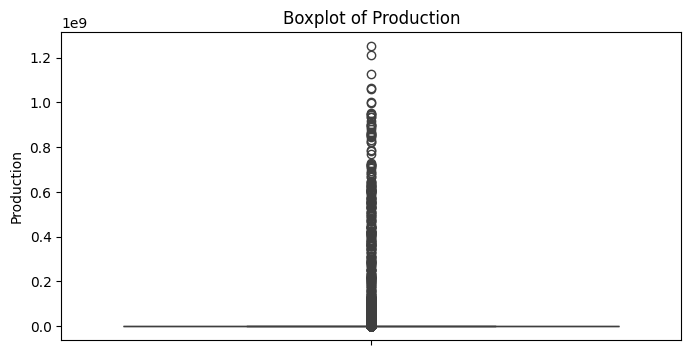

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Removing outliers using zscore

In [8]:
from scipy.stats import zscore

# Using z-score
z_scores = df[numeric_cols].apply(zscore)
df = df[(z_scores < 3).all(axis=1)]


### Checking Data Types

In [9]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

### Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.dtypes

State_Name         int64
District_Name      int64
Crop_Year          int64
Season             int64
Crop               int64
Area             float64
Production       float64
dtype: object

### Visualization

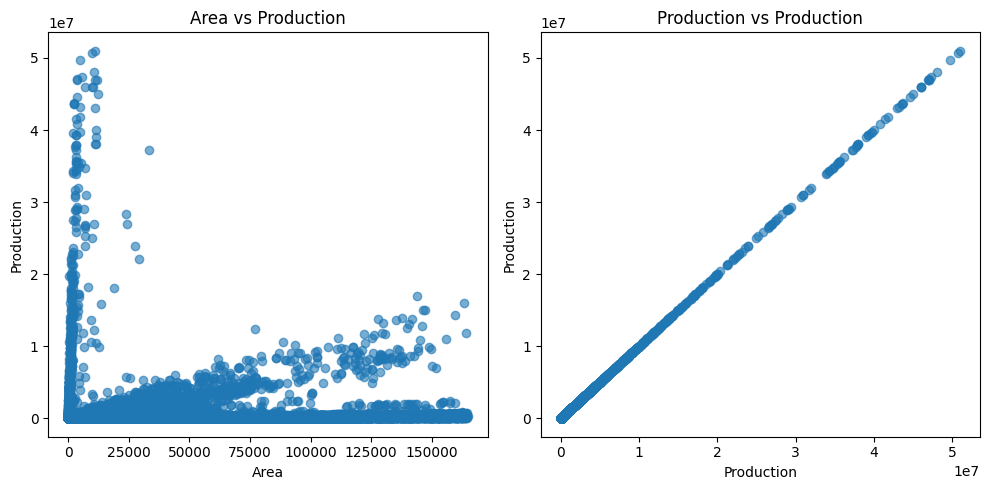

In [25]:
import matplotlib.pyplot as plt

# List of numeric features to check
numeric_features = ["Area", "Production"]

plt.figure(figsize=(10, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    plt.scatter(df[feature], df["Production"], alpha=0.6)
    plt.title(f"{feature} vs Production")
    plt.xlabel(feature)
    plt.ylabel("Production")

plt.tight_layout()
plt.show()

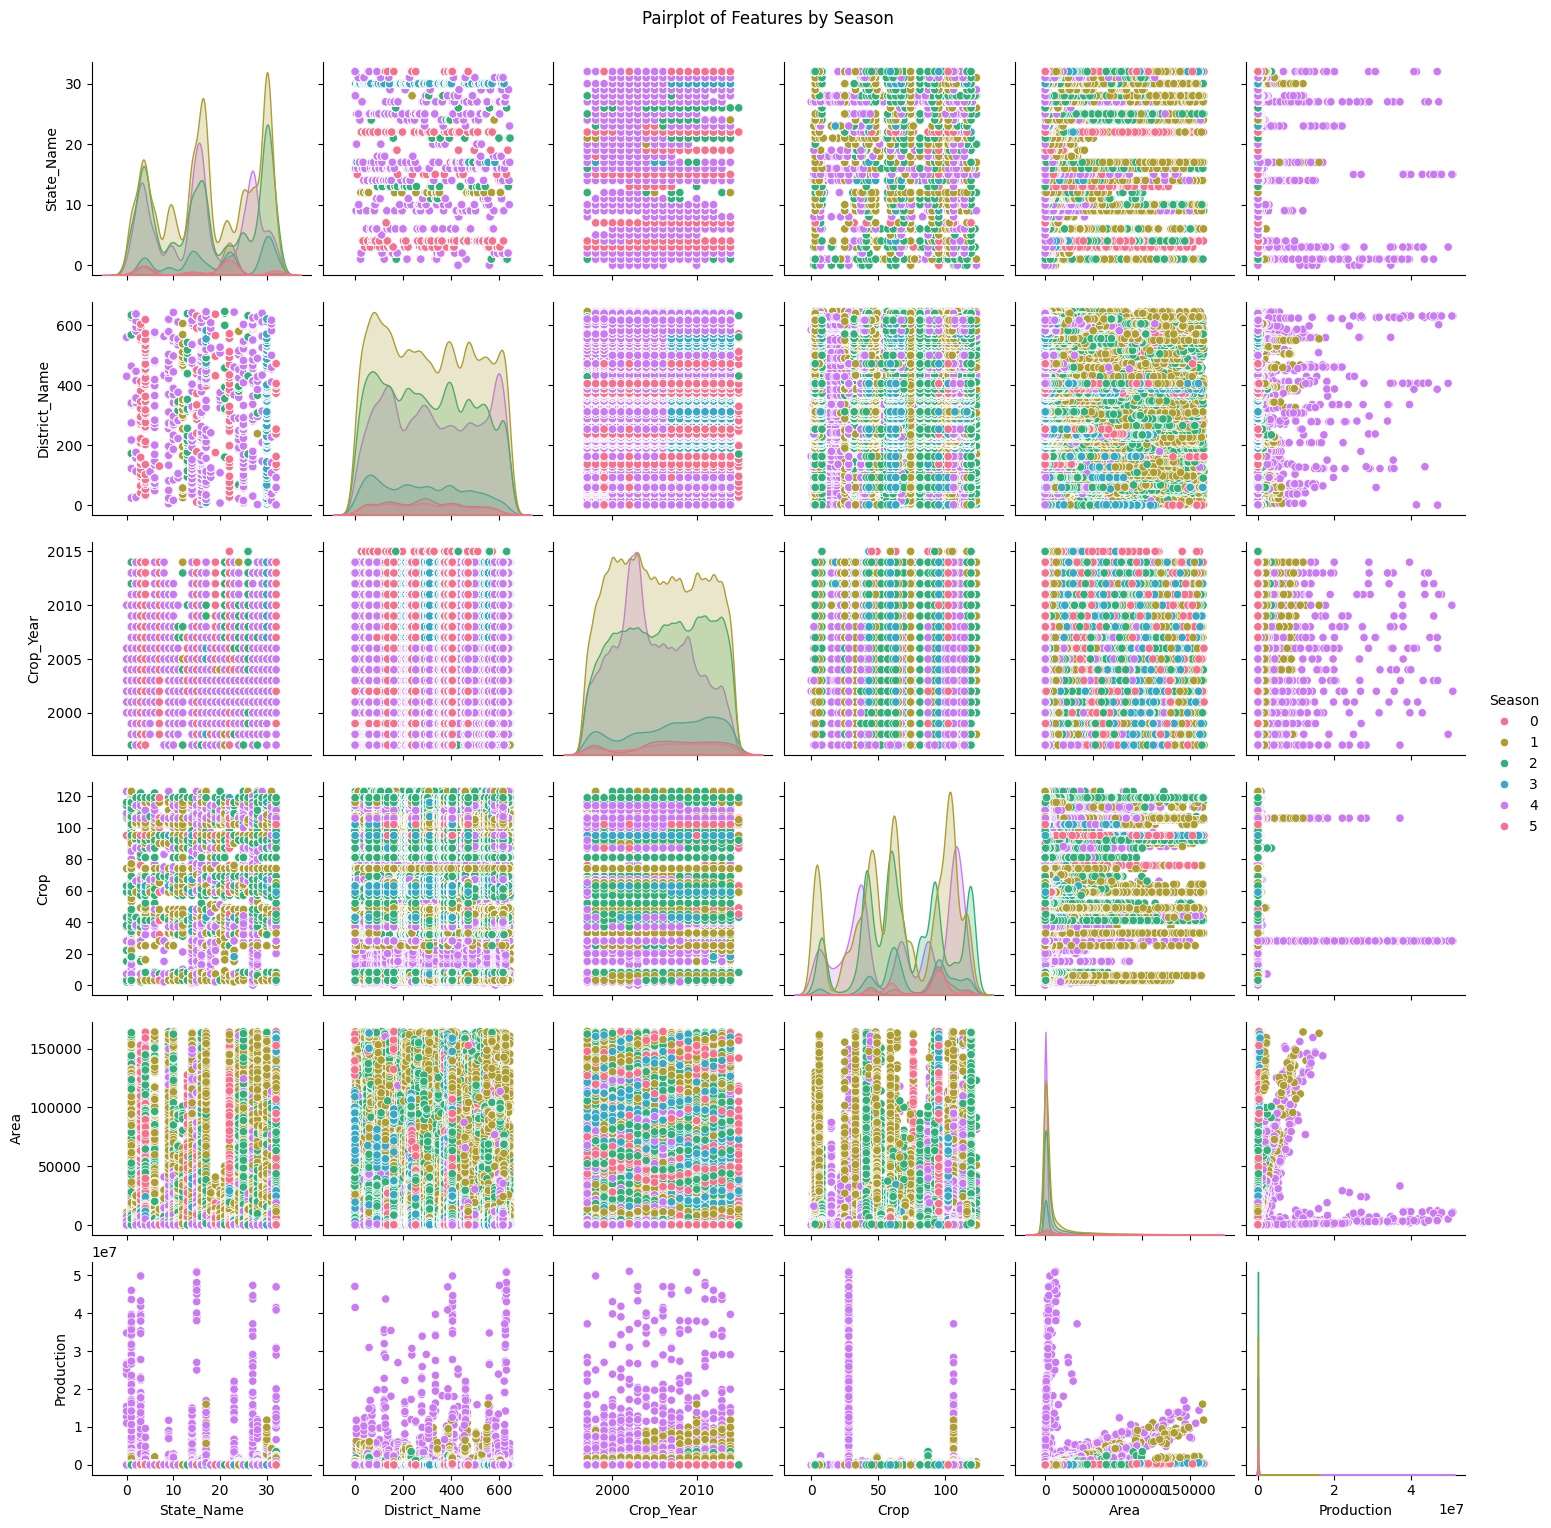

In [15]:
sns.pairplot(df, diag_kind="kde", hue="Season", markers="o", palette="husl")
plt.suptitle("Pairplot of Features by Season", y=1.02)  # Add a title
plt.show()


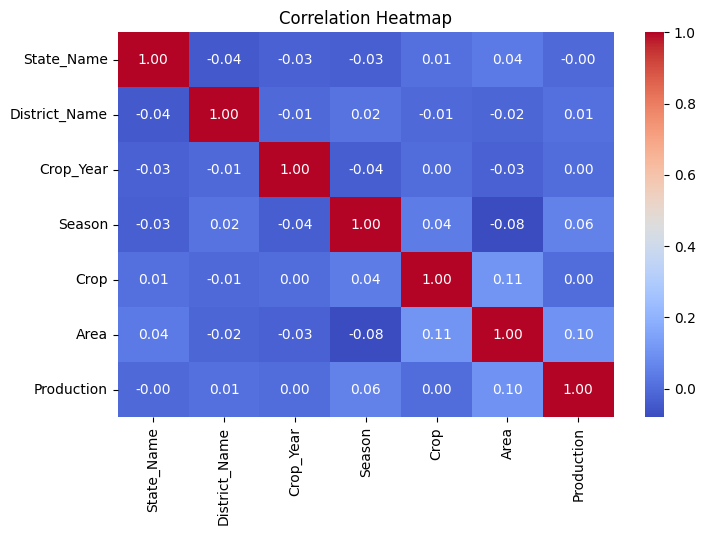

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


### Scaling data

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
features = df.drop("Production", axis=1)  
target = df["Production"]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
scaled_df["Production"] = target.reset_index(drop=True)
print(scaled_df.head())

   State_Name  District_Name  Crop_Year    Season      Crop      Area  \
0   -1.745067        0.61693  -1.135687 -0.911356 -1.951537 -0.321880   
1   -1.745067        0.61693  -1.135687 -0.911356  0.166533 -0.378527   
2   -1.745067        0.61693  -1.135687 -0.911356  0.784304 -0.374002   
3   -1.745067        0.61693  -1.135687  1.422909 -1.804449 -0.370654   
4   -1.745067        0.61693  -1.135687  1.422909 -1.363184 -0.346041   

   Production  
0      2000.0  
1         1.0  
2       321.0  
3       641.0  
4       165.0  


### Split data

In [20]:
# Define features and target
X = scaled_df.drop(columns=['Production'])  # Drop the target column
y = scaled_df['Production']  # Target column
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 166969
Validation set size: 35779
Test set size: 35780


### Import necessary libraries

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

### Define all models

In [22]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

### Check for training and validation accuracy

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
for model_name, model in models:
    model.fit(X_train, y_train)
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate R² and MSE for both sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    print(f"{model_name} - Training R²: {r2_train}, Validation R²: {r2_val}")
    print(f"{model_name} - Training MSE: {mse_train}, Validation MSE: {mse_val}\n")

Linear Regression - Training R²: 0.014776942617215849, Validation R²: 0.014914205496546429
Linear Regression - Training MSE: 630432192146.5205, Validation MSE: 723711924575.5681

Decision Tree - Training R²: 1.0, Validation R²: 0.9165195460248938
Decision Tree - Training MSE: 4.844555436294396e-38, Validation MSE: 61330495625.73346

Random Forest - Training R²: 0.9825948885068067, Validation R²: 0.9366861661530937
Random Forest - Training MSE: 11137318103.737051, Validation MSE: 46514706436.00031

Gradient Boosting - Training R²: 0.4174347460312807, Validation R²: 0.5435617297800648
Gradient Boosting - Training MSE: 372776385383.7631, Validation MSE: 335331014652.70844



#### Evaluting model

In [24]:
best_model = None
best_r2_score = -float('inf') 
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - R²: {r2}")
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model_name
print(f"\nThe best model is: {best_model} with R² score: {best_r2_score}")

Linear Regression - R²: 0.015870604306223668
Decision Tree - R²: 0.7440751384793871
Random Forest - R²: 0.7847536301191748
Gradient Boosting - R²: 0.4611130334827017

The best model is: Random Forest with R² score: 0.7847536301191748


### Relating actual and predicted values 

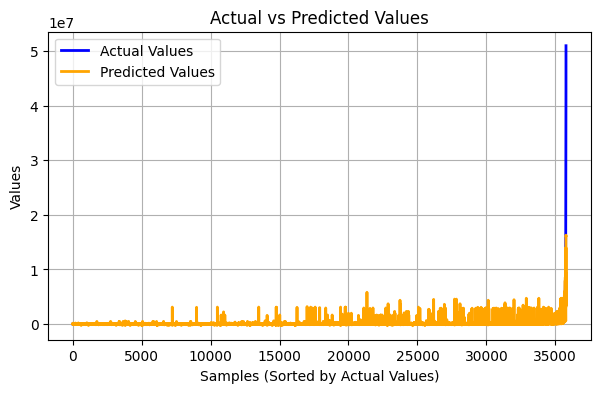

In [27]:
import matplotlib.pyplot as plt
import numpy as np
indices = np.argsort(y_test) 
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]
plt.figure(figsize=(7, 4))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Values", color="orange", linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples (Sorted by Actual Values)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

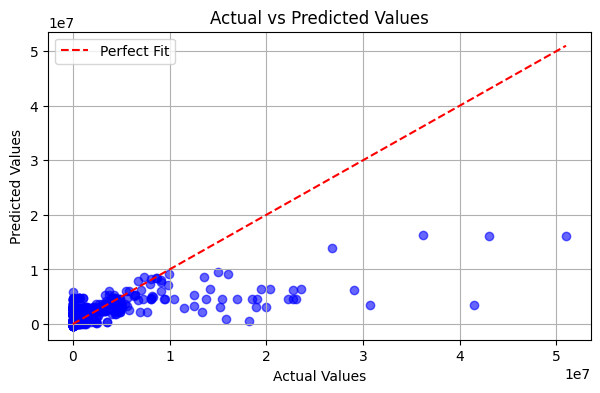

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


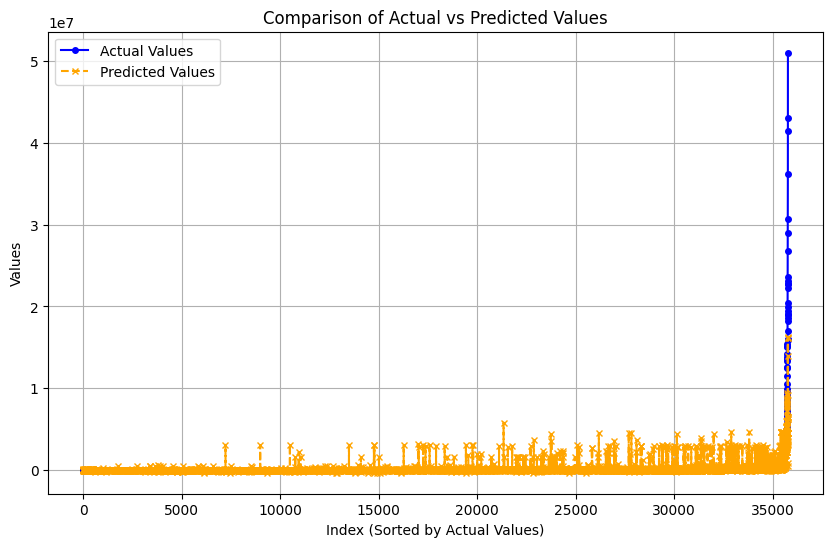

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test and y_pred to NumPy arrays for sorting
y_test_array = np.array(y_test).flatten()
y_pred_array = np.array(y_pred).flatten()

# Sort values based on y_test
indices = np.argsort(y_test_array)
y_test_sorted = y_test_array[indices]
y_pred_sorted = y_pred_array[indices]

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", marker="o", linestyle="-", markersize=4)
plt.plot(y_pred_sorted, label="Predicted Values", color="orange", marker="x", linestyle="--", markersize=4)
plt.title("Comparison of Actual vs Predicted Values")
plt.xlabel("Index (Sorted by Actual Values)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


##### Linear Regression	looks like Underfitting
##### Decision Tree looks Balanced
##### Random Forest looks like Well-Balanced
##### Gradient Boosting looks like Underfitting

In [22]:
df.corr()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
State_Name,1.000000,-0.042940,-0.025344,-0.031856,0.008884,0.036618,-0.004521
District_Name,-0.042940,1.000000,-0.006473,0.017900,-0.005541,-0.016397,0.012651
Crop_Year,-0.025344,-0.006473,1.000000,-0.035343,0.002771,-0.027552,0.002139
Season,-0.031856,0.017900,-0.035343,1.000000,0.038622,-0.079970,0.058389
Crop,0.008884,-0.005541,0.002771,0.038622,1.000000,0.106071,0.000795
Area,0.036618,-0.016397,-0.027552,-0.079970,0.106071,1.000000,0.100473
Production,-0.004521,0.012651,0.002139,0.058389,0.000795,0.100473,1.000000
